In [29]:
import tensorflow as tf
import numpy as np
from keras_facenet import FaceNet
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
embedder = FaceNet()

Total number of images found! 20


(-0.5, 298.5, 167.5, -0.5)

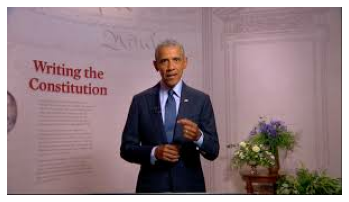

In [182]:
base_dir = "Resources/data"
persons = os.listdir(base_dir)
images = []
image_paths = []
for person in persons:
    paths = os.listdir(os.path.join(base_dir,person))
    for path in paths:
        image_paths.append(os.path.join(base_dir,person,path))
        file = tf.io.read_file(os.path.join(base_dir,person,path))
        images.append(tf.image.decode_jpeg(file , channels = 3))
print("Total number of images found!", len(images))

#sample image
plt.imshow(images[5] , cmap = "gray")
plt.axis("off")

In [184]:
# detecting face using openCV

def Face_detection(image_path):
    ''' it will detect the face in a image 
        and will return a list of cropped images containing only face.
        
        input: list of image path on working directory
    
    '''
    
    crop_img = []
    
    faceCascade= cv2.CascadeClassifier("Resources/haarcascades/haarcascade_frontalface_default.xml")
    
    for path in image_path:
        img = cv2.imread(path)
#         img = cv2.resize(img , (96,96) , interpolation = cv2.INTER_NEAREST)
#         imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face = faceCascade.detectMultiScale(img,1.1,4)
#         print(face)
        if len(face) != 0:
            for (x,y,w,h) in face:
                Cropped = img[y : y + h , x: x+w ]
                Cropped = cv2.cvtColor(Cropped , cv2.COLOR_BGR2RGB)
                crop_img.append(Cropped)
            
        
    return crop_img


In [171]:
# cropped images
Faces = Face_detection(image_paths)


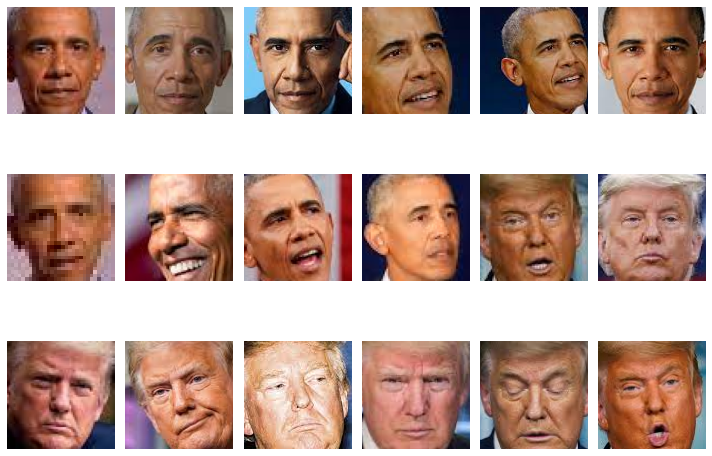

In [177]:
#plotting various faces found in our dataset!

fig , ax = plt.subplots(3,6 , figsize = (10,8))

for j in range(3):
    for i in range(6):
        plt.sca(ax[j][i])
        plt.axis("off")
        plt.tight_layout()
        if j == 0:
            plt.imshow(Faces[i] )
        elif j == 1:
            plt.imshow(Faces[i+6])
        elif j == 2:
            plt.imshow(Faces[i+6+6])
           
            

In [33]:
embeddings = embedder.embeddings(Faces)

In [114]:
#creating a database for people we expect to visit us.
database_size = 5
database = {}
for person in persons:
    if person == "Barak_obama":
        database[str(person)] = embeddings[:database_size]
    else:
        database[str(person)] = embeddings[10: 10 + database_size] #since we got the first 10 images of Obama in our dataset
    
database

{'Barak_obama': array([[ 0.05515219, -0.02296523,  0.01986018, ...,  0.00101684,
         -0.05502384, -0.00810597],
        [ 0.02733295, -0.02613608,  0.03678601, ..., -0.02523007,
         -0.08134899,  0.01741505],
        [ 0.01963886,  0.00396612,  0.02694892, ..., -0.03089734,
         -0.05015653,  0.00664534],
        [-0.00645211,  0.05269543,  0.06447765, ..., -0.01489183,
         -0.0734812 ,  0.08171562],
        [-0.0012973 ,  0.04553507,  0.05683045, ...,  0.01281135,
         -0.05623588,  0.00944763]], dtype=float32),
 'Donald_trump': array([[ 0.10603339, -0.03321073,  0.08672786, ..., -0.05803406,
          0.04698098,  0.03959098],
        [ 0.11412261, -0.06253   ,  0.10258418, ..., -0.06414917,
          0.0199477 ,  0.01419908],
        [ 0.10075945, -0.01608059,  0.12718932, ..., -0.05424056,
         -0.02029491,  0.00677519],
        [ 0.11495505, -0.03987469,  0.11852771, ..., -0.07702499,
         -0.01323807, -0.01473232],
        [ 0.11511165, -0.05287332,

In [120]:
#our facenet has returned embeddings of size 512
database['Barak_obama'].shape


(5, 512)

In [178]:
def Face_recog(image_path , alpha = 2):
    '''
    image_path : list of individual input image path.
    alpha : it is a hyperparameter
    '''
    
    #detecting face
    image = Face_detection(image_path)
    plt.axis("off")
    plt.imshow(image[0])
    plt.show()
 


    
    img_embedding = embedder.embeddings(image)
    
    #calculate dist wrt to database images
    min_dist = 100
    for (name,db_emb) in database.items():
        
        for emb in db_emb:
        
            dist = np.linalg.norm(img_embedding - db_emb)
            
            if dist < min_dist:
                min_dist = dist
                identity = name
            
    if min_dist > alpha:
        print("Not found in Database, Kindly contact the admin!!")
        
    else:
        print(f"Welcome!! {identity} , Have a good day!! ")
    
    
    
    
    

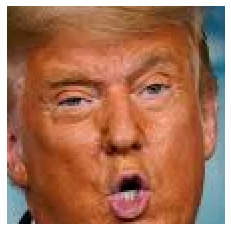

Welcome!! Donald_trump , Have a good day!! 


In [179]:
#lets test it

test_img_path = ['Resources/data\\Donald_trump\\images.jpg']
Face_recog(test_img_path)




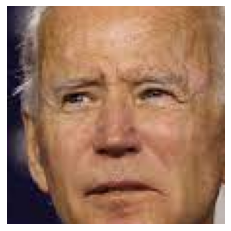

Not found in Database, Kindly contact the admin!!


In [180]:
test_img_path = ['Resources\data\Joe_biden\jb1.jpg']
Face_recog(test_img_path)


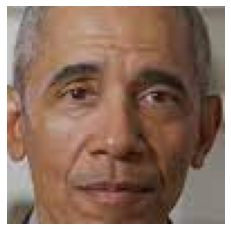

Welcome!! Barak_obama , Have a good day!! 


In [181]:
test_img_path = ['Resources/data\\Barak_obama\\download (2).jpg']
Face_recog(test_img_path)